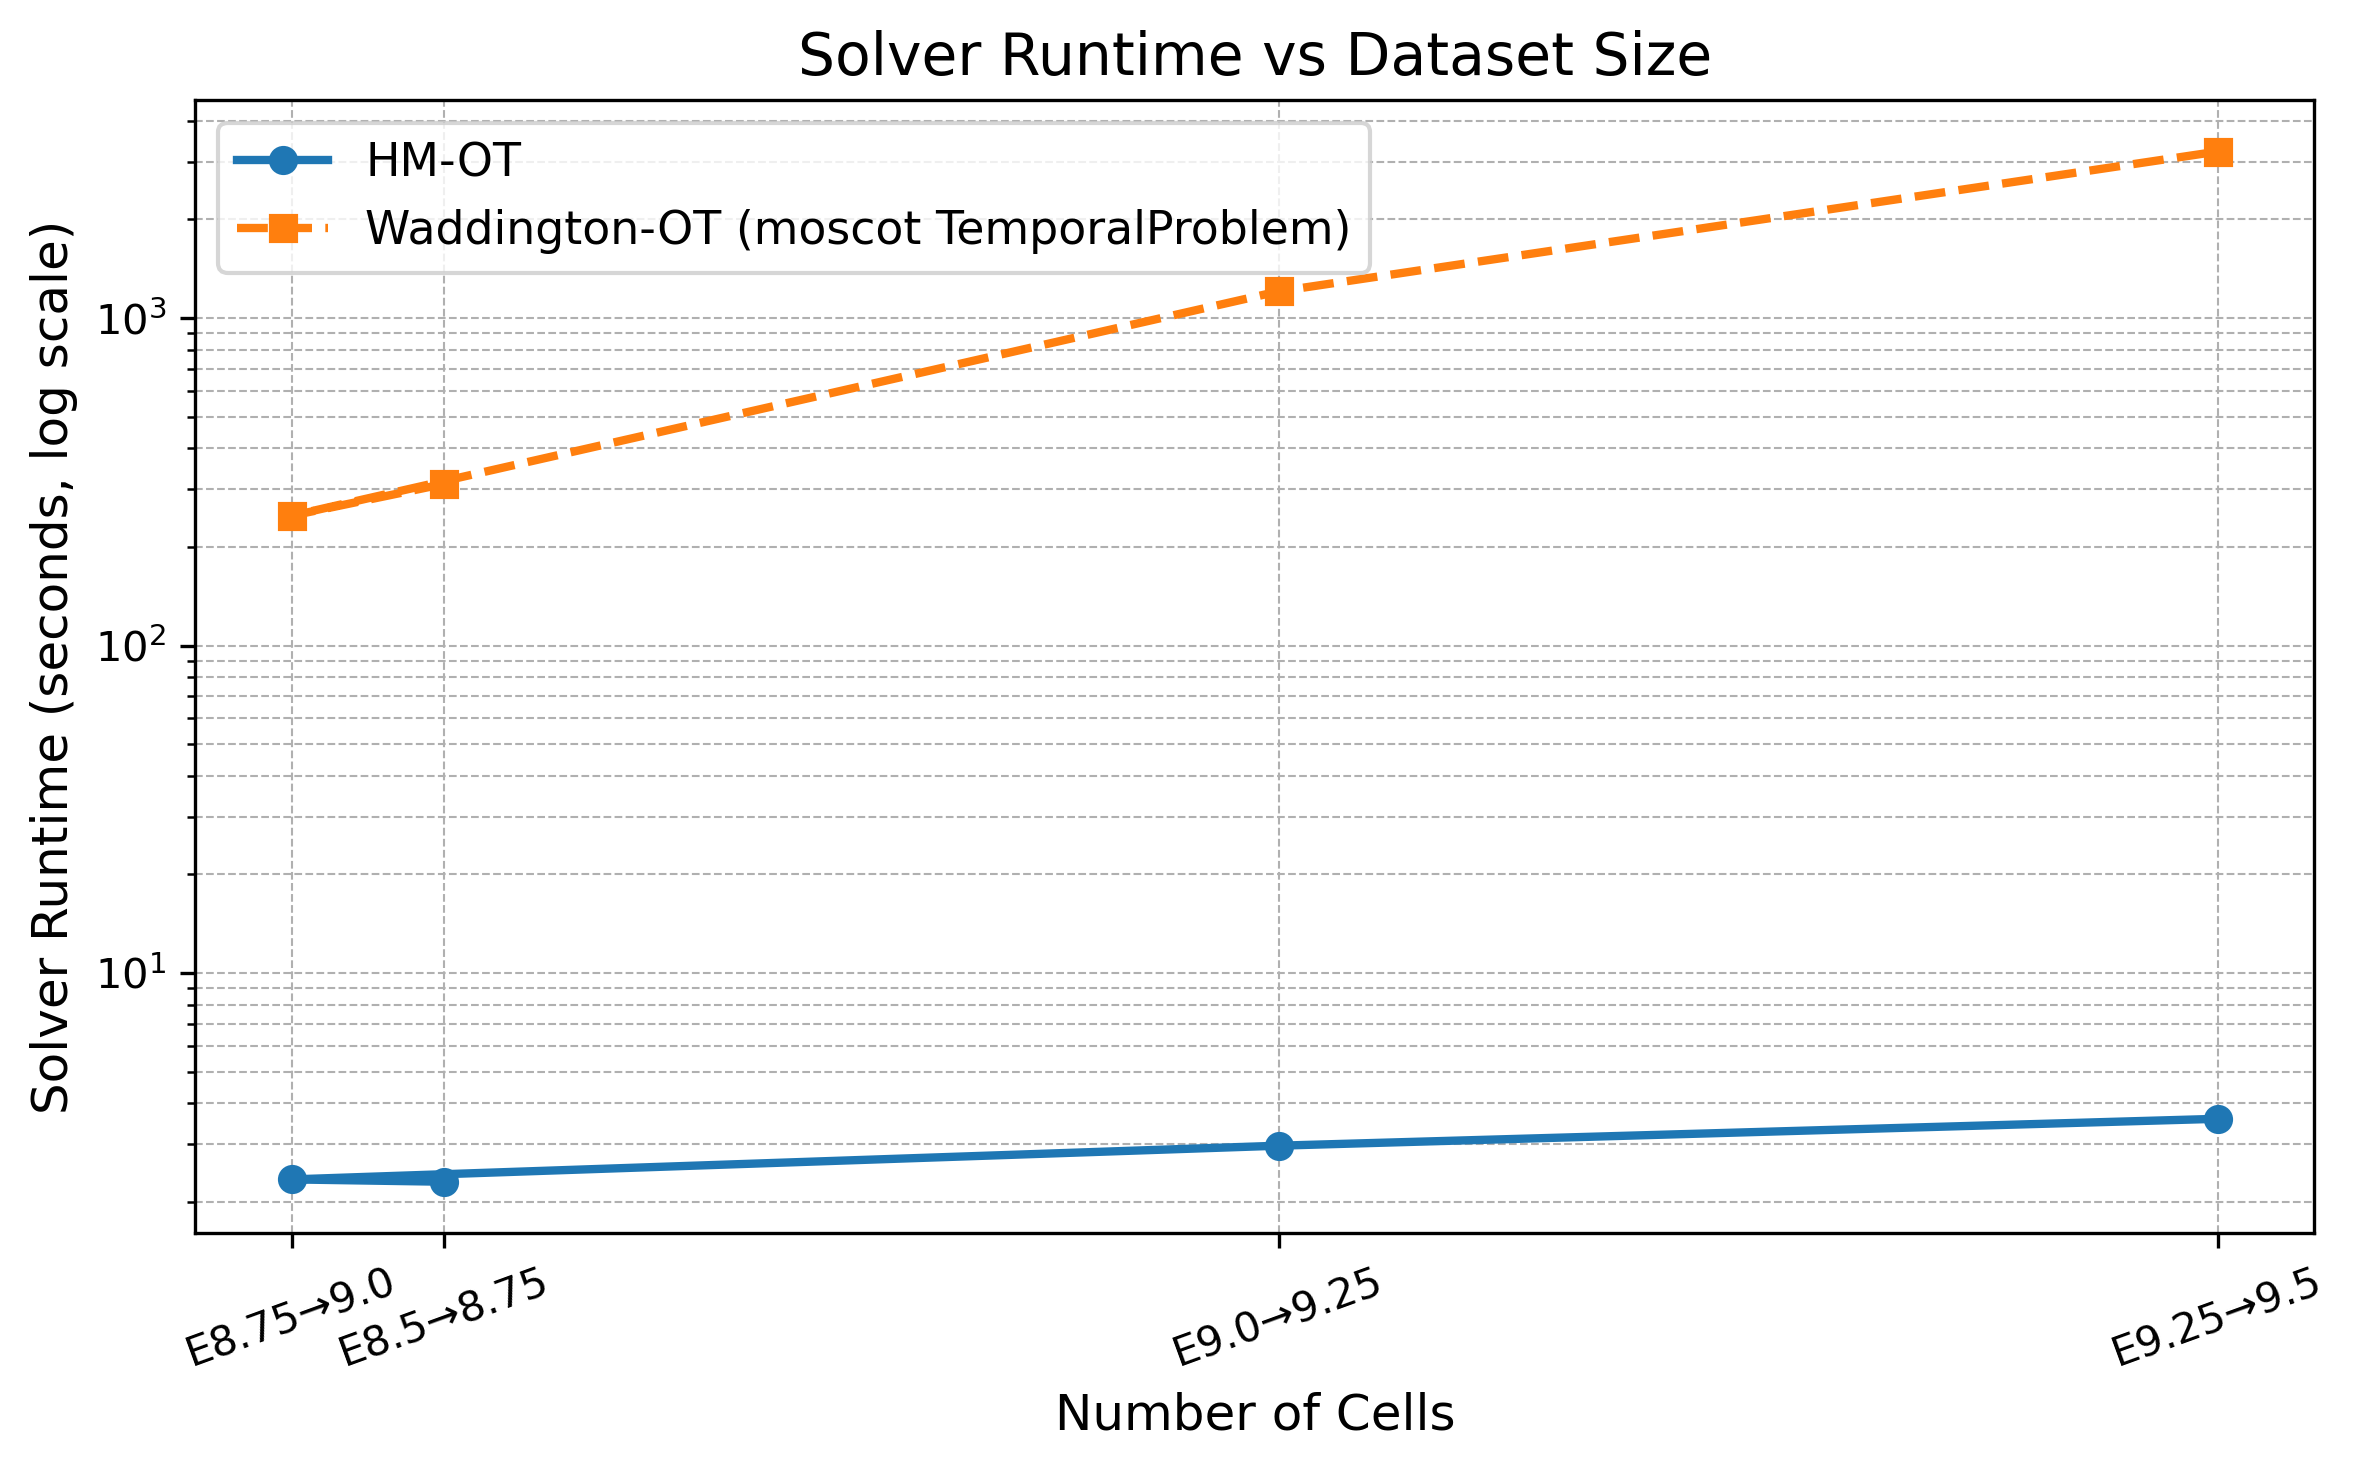

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset timepoints and corresponding number of cells
timepoints = ['E8.5→8.75', 'E8.75→9.0', 'E9.0→9.25', 'E9.25→9.5']
num_cells = [199850, 164302, 394473, 613423]  # X-axis

# Solver runtimes
hmot_runtimes = [2.305, 2.343, 2.970, 3.588]  # seconds
moscot_runtimes = [5.193 * 60, 4.154 * 60, 20.113 * 60, 53.744 * 60]  # minutes to seconds

# Plotting
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(num_cells, hmot_runtimes, marker='o', linestyle='-', color='C0', label='HM-OT', linewidth=2)
plt.plot(num_cells, moscot_runtimes, marker='s', linestyle='--', color='C1', label='Waddington-OT (moscot TemporalProblem)', linewidth=2)

# Labels and aesthetics
plt.yscale('log')  # log-scale to emphasize runtime differences
plt.xlabel('Number of Cells', fontsize=12)
plt.ylabel('Solver Runtime (seconds, log scale)', fontsize=12)
plt.title('Solver Runtime vs Dataset Size', fontsize=14)
plt.xticks(num_cells, timepoints, rotation=20)
plt.legend(fontsize=11)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Layout
plt.tight_layout()
plt.show()

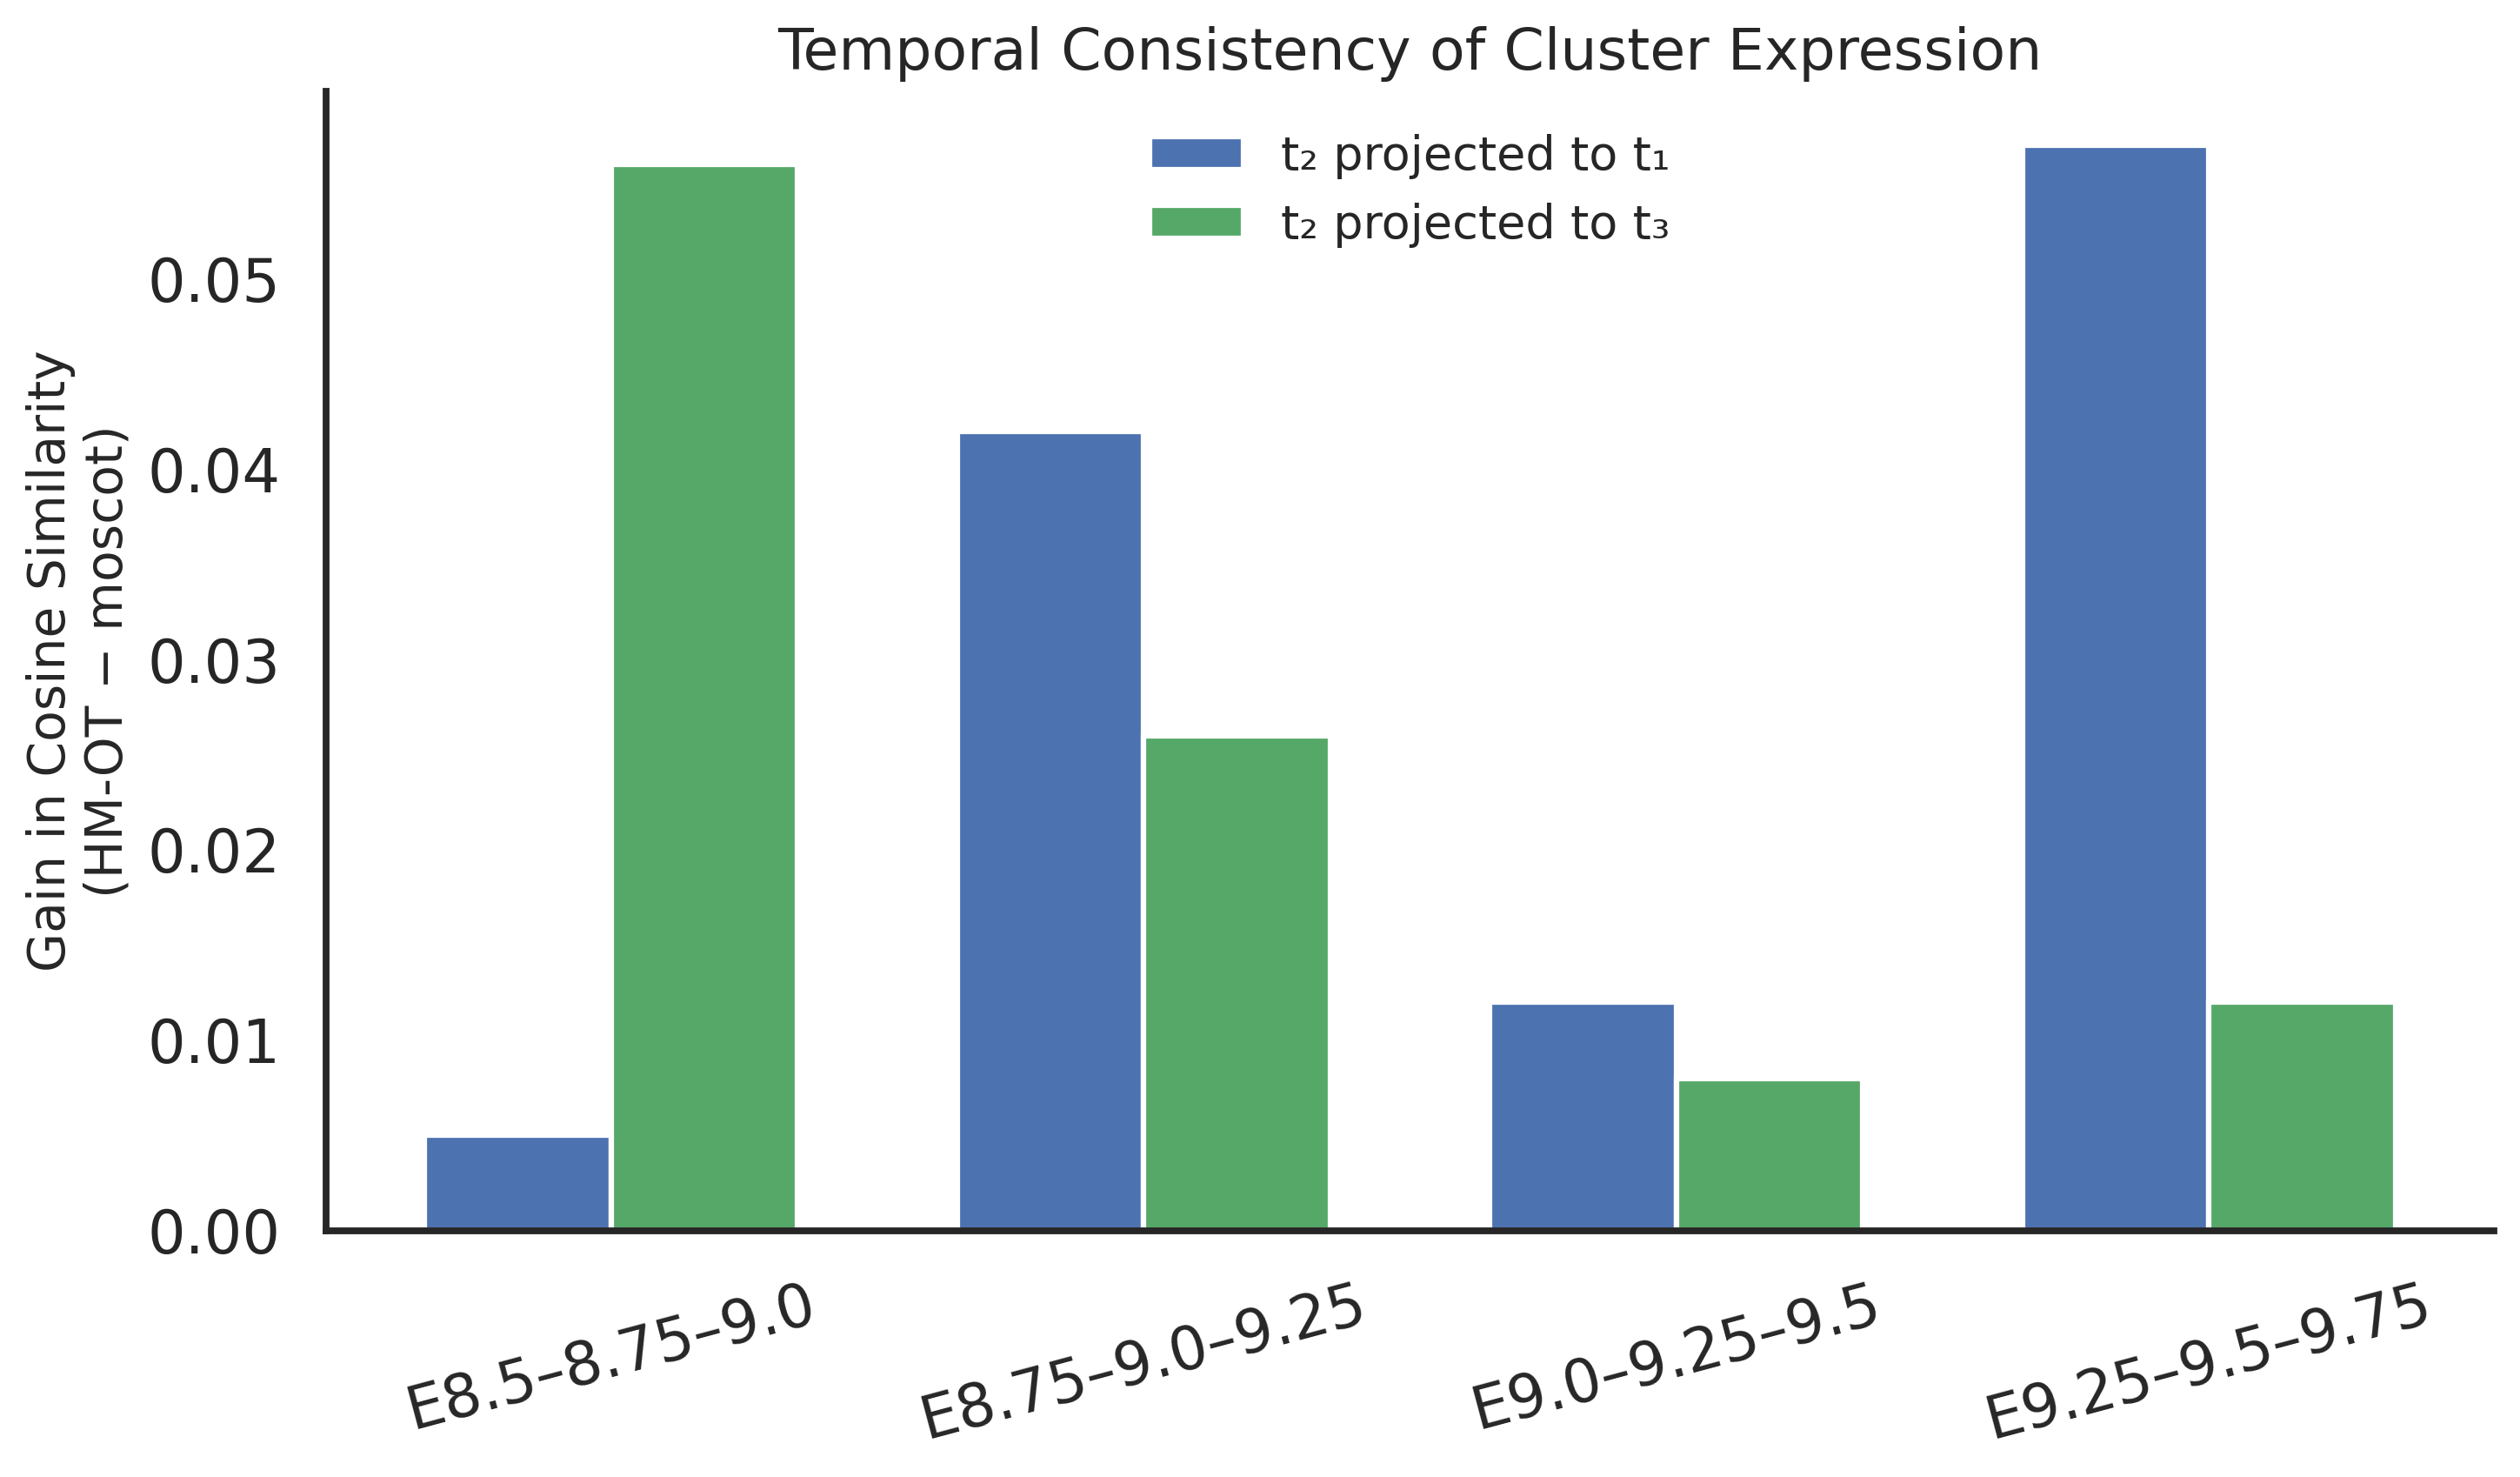

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Nature-style
sns.set_context("talk")
sns.set_style("white")

# List of timepoint triples (e.g., E8.5–E8.75–E9.0)
triples = [
    'E8.5–8.75–9.0', 
    'E8.75–9.0–9.25', 
    'E9.0–9.25–9.5',
    'E9.25–9.5–9.75'
]

# Cosine similarities for projections of t2 → t1
hmot_t1 = [0.891, 0.719, 0.836, 0.575]
moscot_t1 = [0.886, 0.677, 0.824, 0.518]

# Cosine similarities for projections of t2 → t3
hmot_t3 = [0.687, 0.795, 0.854, 0.881]
moscot_t3 = [0.631, 0.769, 0.846, 0.869]

# Gain calculation
gain_t1 = np.array(hmot_t1) - np.array(moscot_t1)
gain_t3 = np.array(hmot_t3) - np.array(moscot_t3)

# Bar plot setup
x = np.arange(len(triples))
width = 0.35
colors = ['#4C72B0', '#55A868']

plt.figure(figsize=(10, 6), dpi=300)
bars1 = plt.bar(x - width/2, gain_t1, width, label='t₂ projected to t₁', color=colors[0])
bars2 = plt.bar(x + width/2, gain_t3, width, label='t₂ projected to t₃', color=colors[1])

'''
# Value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.005:  # skip negligible
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
                     f"{height:.2f}", ha='center', va='bottom', fontsize=12)'''

# Aesthetics
plt.xticks(x, triples, rotation=15)
plt.ylabel('Gain in Cosine Similarity\n(HM-OT − moscot)', fontsize=14)
plt.title('Temporal Consistency of Cluster Expression', fontsize=16)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(frameon=False, fontsize=13)
sns.despine()

plt.tight_layout()
plt.show()
